# Proyek Analisis Data: Bike Sharing Analyst
- **Nama:** Salman Alfarizi
- **Email:** salmanalfarizi.elektro@gmail.com
- **ID Dicoding:** salman_alfarizi_29

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah penyewaan sepeda selama beberapa bulan terakhir?
- Pada saat musim apa jumlah pengguna yang menyewa sepeda paling banyak?
- Pengguna dengan jenis apa yang paling sering menyewa sepeda?
- Bagaimana cuaca dapat mempengaruhi jumlah pengguna yang menyewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [82]:
#import data hour.csv
hour_df = pd.read_csv("data/hour.csv", delimiter=',')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [83]:
#import data day.csv
day_df = pd.read_csv("data/day.csv", delimiter=',')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Pada tabel data hour_df, terdapat variabel instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual,registered, dan cnt
- Pada tabel data day_df, hampir sama seperti tabel data hour_df. Namun, tabel data day_df tidak memiliki variabel hr

### Assessing Data

#### Mengecek Kualitas Data hour_df

In [84]:
#Mengecek kualitas data hour_df
print("===================================================")
print("Melihat tipe data dan jumlah data yang tidak null")
print("===================================================")
hour_df.info()
print("===================================================")
print("Melihat jumlah data yang null")
print("===================================================")
print(hour_df.isna().sum())
print("===================================================")
print("Melihat jumlah data yang terduplikat")
print("===================================================")
print("Jumlah data yang terduplikat :", hour_df.duplicated().sum(), "\n")
print("===================================================")
print("Deskripsi Data")
print("===================================================")
print(hour_df.describe())

Melihat tipe data dan jumlah data yang tidak null
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

#### Mengecek Kualitas Data day_df

In [85]:
#melihat kualitas data day_df
print("===================================================")
print("Melihat tipe data dan jumlah data yang tidak null")
print("===================================================")
day_df.info()
print("===================================================")
print("Melihat jumlah data yang null")
print("===================================================")
print(day_df.isna().sum())
print("===================================================")
print("Melihat jumlah data yang terduplikat")
print("===================================================")
print("Jumlah data yang terduplikat :", day_df.duplicated().sum(), "\n")
print("===================================================")
print("Deskripsi Data")
print("===================================================")
print(day_df.describe())

Melihat tipe data dan jumlah data yang tidak null
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Melihat jumlah data yang null
instant      

#### Mengecek Jumlah Pengguna Pada Data hour_df Apakah Sama Dengan pada data day_df

In [86]:
#Melihat apakah jumlah Pengguna pada tabel hour_df sama dengan tabel day_df
sum_customer = hour_df.groupby(by="dteday", as_index=False).agg({
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"
})

columns_ = ["casual", "registered"]
for column in columns_:
    sum_customer.rename(columns={
        column : column + "_hour_df"
    })
    sum_customer[column + "_day_df"] = day_df[column]

inconsistent = 0
for i in range(sum_customer.count().max()):
    if(sum_customer["casual"][i] == sum_customer["casual_day_df"][i]):
        continue
    else:
        inconsistent += 1
if(inconsistent == 0):
    print("Semua data memiliki nilai yang konsisten")
else:
    print("Terdapat", inconsistent, "data yang tidak konsisten")

Semua data memiliki nilai yang konsisten


**Insight:**
- Setelah dilakukan Assesing Data, **tidak ditemukan** adanya **data yang terduplikat** dan **data yang tidak memiliki nilai** (null) pada tabel hour_df. Namun, terdapat beberapa kesalahan yaitu tipe data **dteday** seharusnya **datetime, bukan object**. Variabel **weathersit dan season** seharusnya **menggunakan tipe data object** berupa string yang dapat menyatakan kondisi cuaca dan musim pada saat itu, **tidak menggunakan tipe data int**. Pada tabel hour_df **terdapat beberapa variabel yang tidak dibutuhkan** seperti holiday, weekday, workingday, temp, atemp, hum, dan windspeed. Sehingga **dapat dihilangkan** agar dapat saya dapat lebih fokus dalam memproses data yang ingin saya proses.

- Pada tabel data **day_df**, juga **tidak ditemukan data yang terduplikat** dan **data yang tidak bernilai** (null). Namun terdapat variabel **dteday** menggunakan tipe data yang salah. Seharusnya menggunakan **datetime, bukan object**. Variabel **weathersit dan season** pada tabel data tersebut juga harus dapat menyatakan kondisi cuaca dan musim pada hari itu menggunakan kalimat. Sehingga seharusnya menggunakan **tipe data object, bukan int**. Pada tabel day_df, juga **terdapat beberapa variabel yang tidak diperlukan** seperti holiday, weekday, workingday, temp, atemp, hum, dan windspeed. Sehingga **dapat dihapus dari tabel**.

- Setelah **membandingkan jumlah pengguna** dari tabel data hour_df dengan jumlah pengguna dari tabel data day_df, didapatkan kalau **tidak ditemukan nilai yang tidak konsisten**. Hal tersebut dapat dilihat pada program terakhir yang menampilkan **Semua data memiliki nilai yang konsisten**.

### Cleaning Data

#### Mengganti Tipe Data dteday Pada hour_df menjadi datetime

In [87]:
#Mengganti tipe data dteday pada hour_df menjadi datetime
hour_df.dteday = pd.to_datetime(hour_df.dteday)
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#### Mengganti Tipe Data weathersit Pada hour_df Menjadi object dan Merevisi Isi Variabel Tersebut

In [88]:
weathersit_map = {
    1 : "Clear, Few clouds, Partly cloudy",
    2 : "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds",
    3 : "Light Snow, Light Rain + Thunderstorm + Scattered clouds",
    4 : "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"
    }
hour_df["weathersit"] = hour_df["weathersit"].astype("object")
hour_df["weathersit"] = hour_df["weathersit"].map(weathersit_map)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,"Clear, Few clouds, Partly cloudy",0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,"Clear, Few clouds, Partly cloudy",0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,"Clear, Few clouds, Partly cloudy",0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,"Clear, Few clouds, Partly cloudy",0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,"Clear, Few clouds, Partly cloudy",0.24,0.2879,0.75,0.0,0,1,1


#### Mengganti Tipe Data season Pada hour_df menjadi object dan Merevisi Isi Variabel Tersebut

In [89]:
season_map = {1:"spring",
              2:"summer",
              3:"fall",
              4:"winter"
              }

hour_df["season"] = hour_df["season"].astype("object")
hour_df["season"] = hour_df["season"].map(season_map)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,0,6,0,"Clear, Few clouds, Partly cloudy",0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,0,1,1,0,6,0,"Clear, Few clouds, Partly cloudy",0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,0,1,2,0,6,0,"Clear, Few clouds, Partly cloudy",0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,0,1,3,0,6,0,"Clear, Few clouds, Partly cloudy",0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,0,1,4,0,6,0,"Clear, Few clouds, Partly cloudy",0.24,0.2879,0.75,0.0,0,1,1


#### Menghapus Variabel Yang Tidak Dibutuhkan Pada Tabel hour_df

In [90]:
drop_columns = ["holiday", "weekday", "workingday", "temp", "atemp", "hum", "windspeed"]
for column in drop_columns:
    hour_df.drop(columns=[column], inplace=True)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,weathersit,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,"Clear, Few clouds, Partly cloudy",3,13,16
1,2,2011-01-01,spring,0,1,1,"Clear, Few clouds, Partly cloudy",8,32,40
2,3,2011-01-01,spring,0,1,2,"Clear, Few clouds, Partly cloudy",5,27,32
3,4,2011-01-01,spring,0,1,3,"Clear, Few clouds, Partly cloudy",3,10,13
4,5,2011-01-01,spring,0,1,4,"Clear, Few clouds, Partly cloudy",0,1,1


In [91]:
hour_df["dteday"] = hour_df["dteday"] + pd.to_timedelta(hour_df["hr"], unit='h')
hour_df

,instant,dteday,season,yr,mnth,hr,weathersit,casual,registered,cnt
0,1,2011-01-01 00:00:00,spring,0,1,0,"Clear, Few clouds, Partly cloudy",3,13,16
1,2,2011-01-01 01:00:00,spring,0,1,1,"Clear, Few clouds, Partly cloudy",8,32,40
2,3,2011-01-01 02:00:00,spring,0,1,2,"Clear, Few clouds, Partly cloudy",5,27,32
3,4,2011-01-01 03:00:00,spring,0,1,3,"Clear, Few clouds, Partly cloudy",3,10,13
4,5,2011-01-01 04:00:00,spring,0,1,4,"Clear, Few clouds, Partly cloudy",0,1,1
...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31 19:00:00,spring,1,12,19,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",11,108,119
17375,17376,2012-12-31 20:00:00,spring,1,12,20,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",8,81,89
17376,17377,2012-12-31 21:00:00,spring,1,12,21,"Clear, Few clouds, Partly cloudy",7,83,90
17377,17378,2012-12-31 22:00:00,spring,1,12,22,"Clear, Few clouds, Partly cloudy",13,48,61


#### Mengganti Tipe Data dteday Pada day_df menjadi datetime

In [92]:
#Mengganti tipe data dteday pada day_df menjadi datetime
day_df.dteday = pd.to_datetime(day_df.dteday)
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Mengganti Tipe Data weathersit Pada day_df Menjadi object dan Juga Merevisi Isi Variabel Tersebut

In [93]:
day_df["weathersit"] = day_df["weathersit"].map(weathersit_map)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,"Clear, Few clouds, Partly cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,"Clear, Few clouds, Partly cloudy",0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,"Clear, Few clouds, Partly cloudy",0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Mengganti Tipe Data season Pada day_df Menjadi object dan Merevisi Isi Variabel Tersebut

In [94]:
day_df["season"] = day_df["season"].astype("object")
day_df["season"] = day_df["season"].map(season_map)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,6,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,0,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,1,1,"Clear, Few clouds, Partly cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,2,1,"Clear, Few clouds, Partly cloudy",0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,3,1,"Clear, Few clouds, Partly cloudy",0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Menghapus Variabel Yang Tidak Dibutuhkan Pada Tabel day_df

In [95]:
drop_columns = ["holiday", "weekday", "workingday", "temp", "atemp", "hum", "windspeed"]
for column in drop_columns:
    day_df.drop(columns=[column], inplace=True)
day_df.head()

,instant,dteday,season,yr,mnth,weathersit,casual,registered,cnt
0,1,2011-01-01,spring,0,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",331,654,985
1,2,2011-01-02,spring,0,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",131,670,801
2,3,2011-01-03,spring,0,1,"Clear, Few clouds, Partly cloudy",120,1229,1349
3,4,2011-01-04,spring,0,1,"Clear, Few clouds, Partly cloudy",108,1454,1562
4,5,2011-01-05,spring,0,1,"Clear, Few clouds, Partly cloudy",82,1518,1600


**Insight:**
- Tipe data variabel dteday pada tabel hour_df telah terganti menjadi datetime64[ns]

- Tipe data variabel weathersit pada tabel hour_df telah terganti menjadi objek, dan isinya berubah menjadi deskripsi cuaca pada jam tersebut.

- Beberapa variabel seperti temp, atemp, hum, dan windspeed dihapus dikarenakan data tersebut tidak akan digunakan, sehingga saya dapat lebih fokus dalam mengolah data.

- Tipe data variabel dteday pada tabel day_df telah berubah dari awalnya berupa object menjadi datetime[ns].

- Tipe data weathersit yang berada pada tabel day_df telah berubah menjadi object, dan isi dari variabel tersebut berupa deskripsi cuaca pada saat hari tersebut.

- Beberapa variabel seperti temp, atemp, hum, dan windspeed telah dihapus dikarenakan data tersebut tidak akan digunakan pada proses pengolahan data kali ini.

## Exploratory Data Analysis (EDA)

### Melihat Tren Penyewaan Sepeda Tiap Bulannya

In [96]:
day_df.groupby(by="dteday").agg({
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"
})

,casual,registered,cnt
dteday,,,
2011-01-01,331,654,985
2011-01-02,131,670,801
2011-01-03,120,1229,1349
2011-01-04,108,1454,1562
2011-01-05,82,1518,1600
...,...,...,...
2012-12-27,247,1867,2114
2012-12-28,644,2451,3095
2012-12-29,159,1182,1341


### Melihat Jumlah Penyewaan Sepeda Berdasarkan Musimnya

In [97]:
#Melihat jumlah penyewaan sepeda berdasarkan musimnya
basedon_season_df = day_df.groupby(by="season", as_index=False).agg({
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"
})
basedon_season_df

,season,casual,registered,cnt
0,fall,226091,835038,1061129
1,spring,60622,410726,471348
2,summer,203522,715067,918589
3,winter,129782,711831,841613


### Melihat jumlah penyewaan sepeda berdasarkan jenis pengguna

In [98]:
#Melihat jumlah penyewaan sepeda berdasarkan jenis pengguna
cas_cust_rent_freq = day_df["casual"].sum()
reg_cust_rent_freq = day_df["registered"].sum()
cust_freq_df = pd.DataFrame({
    "customer_type" : ["Casual", "Registered"],
    "frequency" : [cas_cust_rent_freq, reg_cust_rent_freq]
})
cust_freq_df

,customer_type,frequency
0,Casual,620017
1,Registered,2672662


### Seberapa pengaruh kondisi cuaca dengan jumlah penyewaan sepeda

In [99]:
#Seberapa pengaruh kondisi cuaca dengan jumlah pengguna yang menyewa sepeda?
basedon_weather_df = hour_df.groupby(by="weathersit").agg({
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"
})
basedon_weather_df.reset_index(inplace=True)
basedon_weather_df

,weathersit,casual,registered,cnt
0,"Clear, Few clouds, Partly cloudy",462745,1875428,2338173
1,Heavy Rain + Ice Pallets + Thunderstorm + Mist...,8,215,223
2,"Light Snow, Light Rain + Thunderstorm + Scatte...",22783,135548,158331
3,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",134481,661471,795952


**Insight:**
- Didapatkan tabel yang menunjukkan tren penyewaan sepeda selama beberapa bulan terakhir
- Didapatkan tabel yang menunjukkan total penyewaan sepeda berdasarkan musim
- Didapatkan tabel yang menunjukkan total penyewaan sepeda berdasarkan jenis pengguna
- Didapatkan tabel yang menunjukkan total penyewaan sepeda berdasarkan cuaca

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren jumlah penyewaan sepeda selama beberapa bulan terakhir?

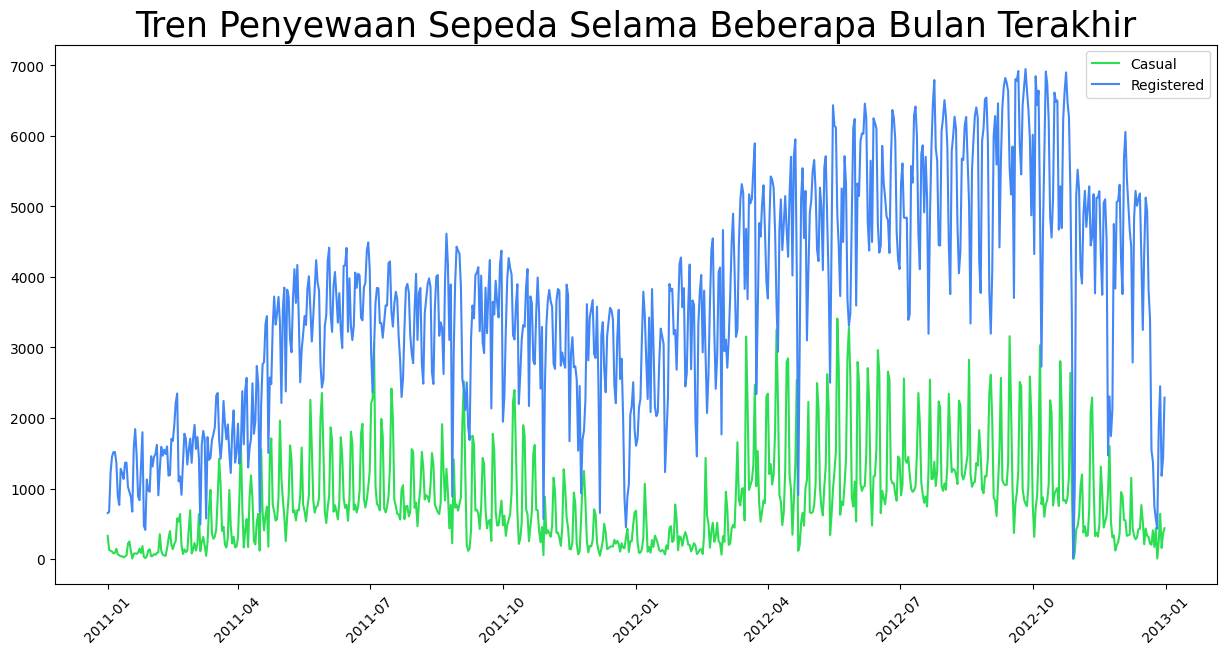

In [100]:
plt.figure(figsize=(15, 7))
plt.title("Tren Penyewaan Sepeda Selama Beberapa Bulan Terakhir", size=25)

plt.plot(day_df["dteday"], day_df["casual"], label="Casual", color="#2cde53")
plt.plot(day_df["dteday"], day_df["registered"], label="Registered", color="#4287f5")

plt.xticks(rotation=45)
plt.legend()

plt.show()

### Pertanyaan 2: Pada saat musim apa jumlah pengguna yang menyewa sepeda paling banyak?

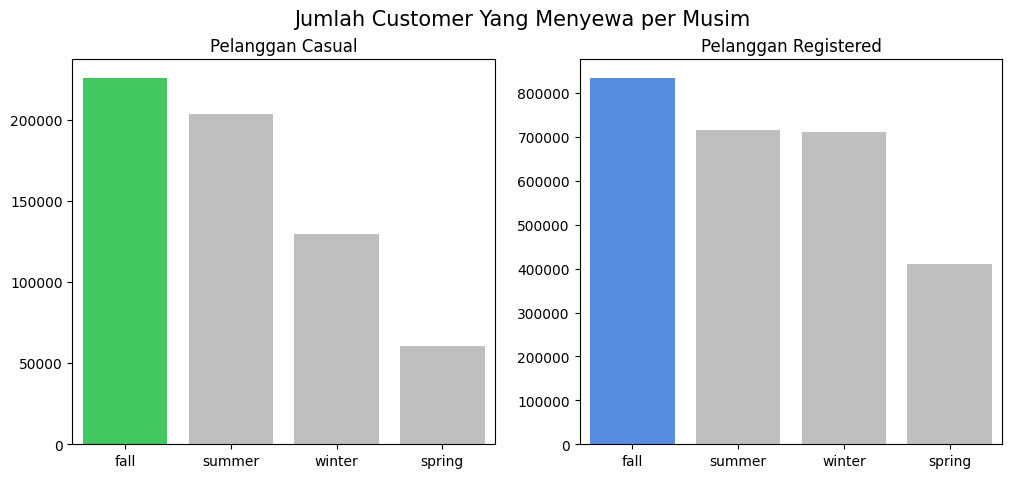

In [101]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
plt.suptitle("Jumlah Customer Yang Menyewa per Musim", size=15)

palette = ["#2cde53", "#bfbfbf", "#bfbfbf", "#bfbfbf"]
sns.barplot(x="season", y="casual", data=basedon_season_df.sort_values(by="casual", ascending=False), hue="season", palette=palette, ax=ax[0])
ax[0].set_title("Pelanggan Casual", size=12)
ax[0].set_xlabel("")
ax[0].set_ylabel("")

palette = ["#4287f5", "#bfbfbf", "#bfbfbf", "#bfbfbf"]
sns.barplot(x="season", y="registered", data=basedon_season_df.sort_values(by="registered", ascending=False), hue="season", palette=palette, ax=ax[1])
ax[1].set_title("Pelanggan Registered", size=12)
ax[1].set_xlabel("")
ax[1].set_ylabel("")

plt.show()

### Pertanyaan 3: Pengguna dengan jenis apa yang paling sering menyewa sepeda?

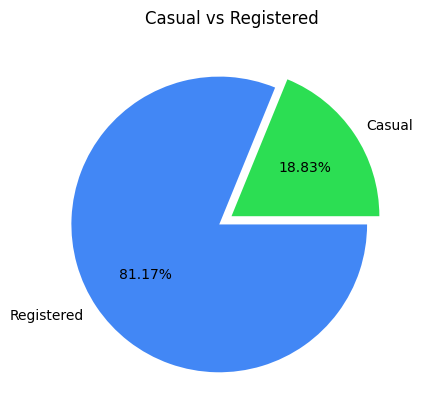

In [102]:
colors = ["#2cde53", "#4287f5"]
explode = [0, 0.1]
plt.title("Casual vs Registered")
plt.pie(
    x=cust_freq_df["frequency"],
    labels=cust_freq_df["customer_type"],
    autopct='%0.2f%%',
    colors=colors,
    explode=explode
)
plt.show()

### Pertanyaan 4: Bagaimana cuaca dapat mempengaruhi jumlah pengguna yang menyewa sepeda?

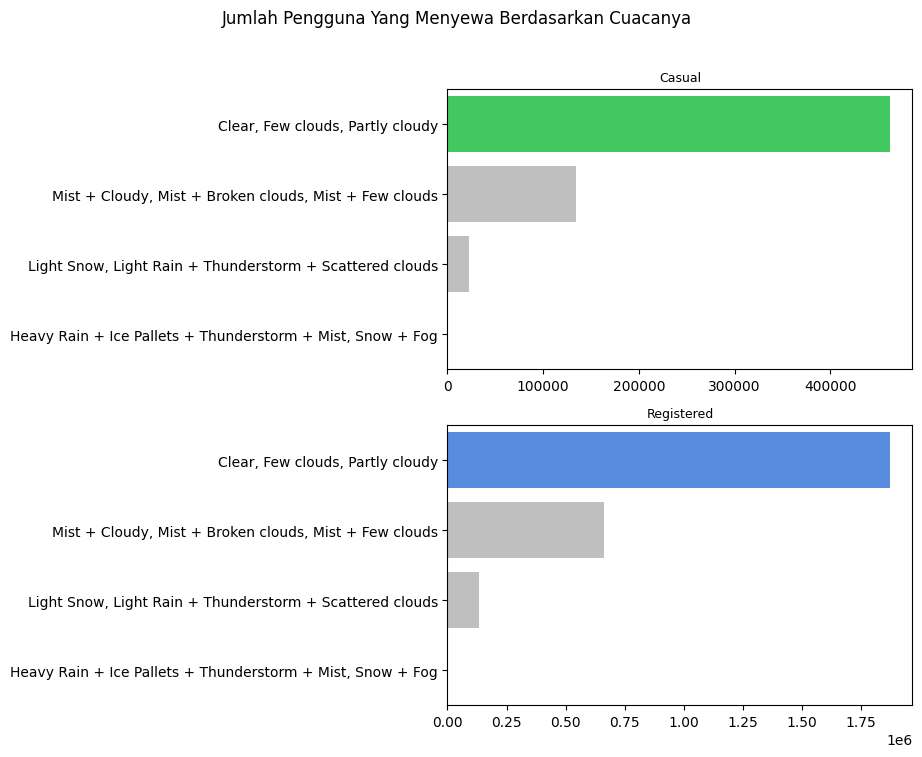

In [103]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6, 8))
plt.suptitle("Jumlah Pengguna Yang Menyewa Berdasarkan Cuacanya", x=0.14, size=12)

palette = ["#2cde53", "#bfbfbf", "#bfbfbf", "#bfbfbf"]
sns.barplot(x="casual", y="weathersit", data=basedon_weather_df.sort_values(by="casual", ascending=False), orient='h', hue="weathersit", palette=palette, ax=ax[0])
ax[0].set_title("Casual", size=9)
ax[0].set_xlabel("")
ax[0].set_ylabel("")

palette = ["#4287f5", "#bfbfbf", "#bfbfbf", "#bfbfbf"]
sns.barplot(x="registered", y="weathersit", data=basedon_weather_df.sort_values(by="registered", ascending=False), orient='h', hue="weathersit", palette=palette, ax=ax[1])
ax[1].set_title("Registered", size=9)
ax[1].set_xlabel("")
ax[1].set_ylabel("")

plt.show()

**Insight:**
- Berdasarkan grafik pertama bahwa **banyaknya yang menyewa** sepeda pertama kali naik mulai dari **awal tahun 2011 hingga bulan Mei 2011**. Setelah itu jumlah pengguna yang menyewa sepeda **menurun hingga akhir bulan desember 2011**. Lalu **Kembali naik** pada bulan Januair 2012, **hingga bulan September 2012**.

- Berdasarkan grafik kedua, maupun pengguna Casual ataupun Registered, **keduanya lebih sering menyewa sepeda ketika musim gugur**, diikuti oleh musim panas, musim dingin, lalu musim semi. 

- Didapatkan dari grafik ketiga bahwa selama 2 tahun terakhir pengguna Registered lebih sering menyewa sepeda dibandingkan pengguna Casual. **81,17%** dari total penyewaan sepeda dilakukan oleh **pengguna Registered**, sedangkan **pengguna Casual hanya 18,83%**.

- Grafik keempat menunjukkan bahwa **kedua jenis pengguna lebih sering menyewa ketika cuacanya sedang cerah/cerah berawan**, lalu diikuti oleh cuaca berkabut/mendung, turun salju ringan/gerimis, lalu hujan deras/hujan es/berkabut tebal.

## Conclusion

- **Conclution pertanyaan 1 :** didapatkan bahwa jumlah penyewaan sepeda akan selalu naik dari awal bulan Januari hingga pertengahan tahun. Setelah itu akan menurun hingga bulan Desember. Lalu siklus akan terulang lagi dari bulan Januari.
- **Conclution pertanyaan 2 :** Musim gugur merupakan musim yang paling cocok bagi pengguna Casual maupun Registered untuk menyewa sepeda
- **Conclution pertanyaan 3 :** Pengguna Registered merupakan pengguna yang paling sering menyewa sepeda. Sehingga pengguna yang menyewa sepeda dominan sudah mendaftarkan diri.
- **Conclution pertanyaan 4 :** didapatkan hasil kalau cuaca ternyata sangatlah mempengaruhi jumlah pengguna yang akan menyewa sepeda. Selama 2 tahun terakhir, pengguna yang menyewa sepeda ketika cuacanya buruk (hujan deras/hujan es/berkabut tebal), hanya terdapat 223 kali pengguna yang menyewa sepeda. Sedangkan saat cuacanya cerah, tedapat 2,3 juta kali lebih pengguna yang menyewa sepeda.